In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
import sklearn.metrics as skm
import seaborn as sn

In [2]:
#load the data

z = np.genfromtxt('assignment2/spambase.data',dtype=float,delimiter=',')
np.random.seed(0) #setting the random seed
rp = np.random.permutation(z.shape[0]) #random set of the indices given the seed
z = z[rp,:]#shuffling the rows of the data
x = z[:,:-1] #all but the last index of label
y = z[:,-1] #only the last row

#getting the majority class information
print(f'number of zero class: {len(y)-sum(y)}')
print(f'number of one class: {sum(y)}')
print('Majority class is the zero class: Not spam')
guess = np.zeros(len(y))
#Get the baseline error if you always predict the 
#baseline accurarcy is the number of true labels divided by total number
base_acc = (len(y)-sum(y))/len(y)
print(f'Base accuracy = {round(base_acc,3)}')
guess_cm = skm.confusion_matrix(y,guess)
guess_disp = skm.ConfusionMatrixDisplay(guess_cm)
print(f'Error base line: {round(1-sk.metrics.accuracy_score(y,guess),3)}')


number of zero class: 2788.0
number of one class: 1813.0
Majority class is the zero class: Not spam
Base accuracy = 0.606
Error base line: 0.394


In [3]:
#make the K folds
Kfolds = sk.model_selection.KFold(n_splits= 5,shuffle=False,random_state=None)
#Don't need to randomize because we already shuffled our data

LDA Error: 0.11432


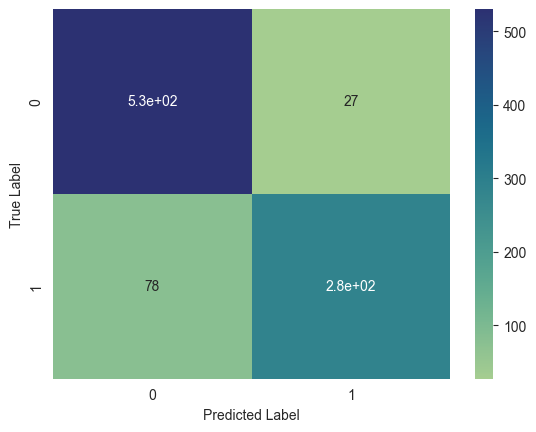

In [4]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
CMlist = []
for j, (train_index,test_index) in enumerate(Kfolds.split(x,y)):
    #pulls the data into test and train data
    train_set_x = x[train_index]
    test_set_x = x[test_index]
    train_set_y = y[train_index]
    test_set_y = y[test_index]
    y_true = test_set_y
    #Fit the model
    model = LDA()
    model.fit(train_set_x,train_set_y)
    y_pred = model.predict(test_set_x)
    #get confusion matrix
    cm = skm.confusion_matrix(y_true,y_pred)
    guess_disp = skm.ConfusionMatrixDisplay(guess_cm)
    CMlist.append(cm)
CM_LDA = np.mean(CMlist,axis=0)
CM_LDA_Dis = skm.ConfusionMatrixDisplay(CM_LDA)
CM_LDA_fig = plt.figure()
sn.heatmap(CM_LDA,annot=True,cmap='crest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('assignment2/CM_LDA.png',dpi=300)
print(f'LDA Error: {round(1- np.sum(np.diag(CM_LDA))/np.sum(CM_LDA),5)}')

C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Error: 0.18083


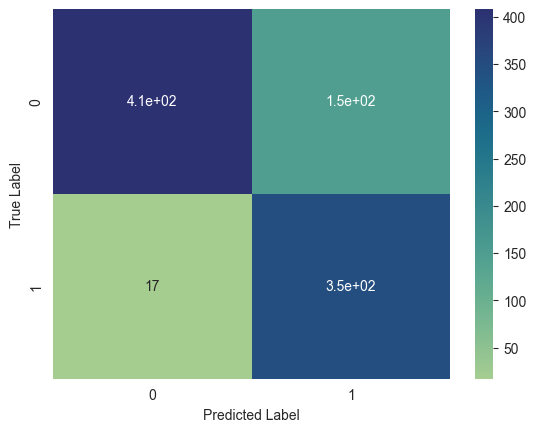

In [5]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
CMlist = []
for j, (train_index,test_index) in enumerate(Kfolds.split(x,y)):
    #pulls the data into test and train data
    train_set_x = x[train_index]
    test_set_x = x[test_index]
    train_set_y = y[train_index]
    test_set_y = y[test_index]
    y_true = test_set_y
    #Fit the model
    model = QDA()
    model.fit(train_set_x,train_set_y)
    y_pred = model.predict(test_set_x)
    #get confusion matrix
    cm = skm.confusion_matrix(y_true,y_pred)
    guess_disp = skm.ConfusionMatrixDisplay(guess_cm)
    CMlist.append(cm)
CM_QDA = np.mean(CMlist,axis=0)
CM_QDA_Dis = skm.ConfusionMatrixDisplay(CM_QDA)
CM_QDA_fig = plt.figure()
sn.heatmap(CM_QDA,annot=True,cmap='crest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('assignment2/CM_QDA.png',dpi=300)
print(f'QDA Error: {round(1- np.sum(np.diag(CM_QDA))/np.sum(CM_QDA),5)}')

C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

LR Error: 0.07477


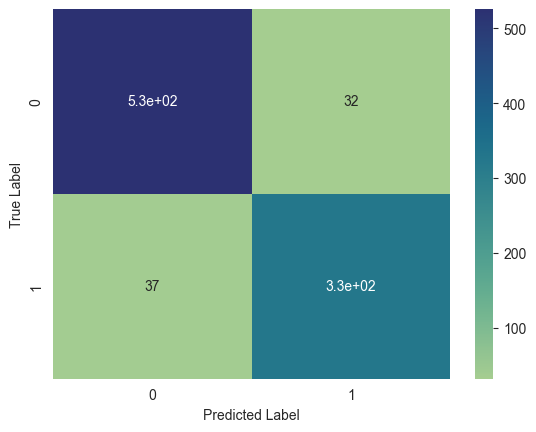

In [6]:
#Logistic regression
from sklearn.linear_model import LogisticRegression as LR
CMlist = []
for j, (train_index,test_index) in enumerate(Kfolds.split(x,y)):
    #pulls the data into test and train data
    train_set_x = x[train_index]
    test_set_x = x[test_index]
    train_set_y = y[train_index]
    test_set_y = y[test_index]
    y_true = test_set_y
    #Fit the model
    model = LR()
    model.fit(train_set_x,train_set_y)
    y_pred = model.predict(test_set_x)
    #get confusion matrix
    cm = skm.confusion_matrix(y_true,y_pred)
    guess_disp = skm.ConfusionMatrixDisplay(guess_cm)
    CMlist.append(cm)
CM_LR = np.mean(CMlist,axis=0)
CM_LR_Dis = skm.ConfusionMatrixDisplay(CM_LR)
CM_LR_fig = plt.figure()
sn.heatmap(CM_LR,annot=True,cmap='crest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('assignment2/CM_LR.png',dpi=300)
print(f'LR Error: {round(1- np.sum(np.diag(CM_LR))/np.sum(CM_LR),5)}')

GNB Error: 0.1804


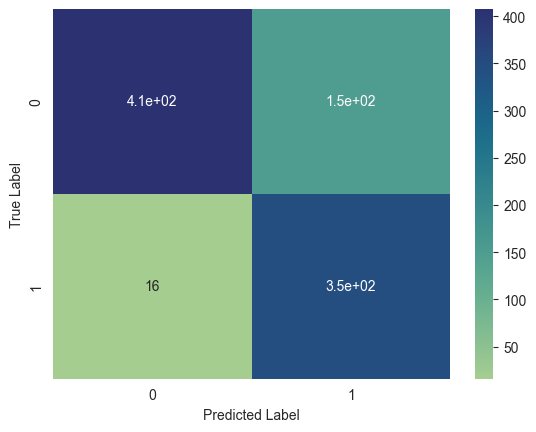

In [7]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB as GNB
CMlist = []
for j, (train_index,test_index) in enumerate(Kfolds.split(x,y)):
    #pulls the data into test and train data
    train_set_x = x[train_index]
    test_set_x = x[test_index]
    train_set_y = y[train_index]
    test_set_y = y[test_index]
    y_true = test_set_y
    #Fit the model
    model = GNB()
    model.fit(train_set_x,train_set_y)
    y_pred = model.predict(test_set_x)
    #get confusion matrix
    cm = skm.confusion_matrix(y_true,y_pred)
    guess_disp = skm.ConfusionMatrixDisplay(guess_cm)
    CMlist.append(cm)
CM_GNB = np.mean(CMlist,axis=0)
CM_GNB_Dis = skm.ConfusionMatrixDisplay(CM_LR)
CM_GNB_fig = plt.figure()
sn.heatmap(CM_GNB,annot=True,cmap='crest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('assignment2/CM_GNB.png',dpi=300)
print(f'GNB Error: {round(1- np.sum(np.diag(CM_GNB))/np.sum(CM_GNB),5)}')